In [3]:
# 🛠️ Importando as bibliotecas
import sqlite3  # Banco de dados leve que roda no próprio projeto
import pandas as pd

# 📂 Lendo os dados do CSV com encoding ajustado
df = pd.read_csv("dados_vendas.csv", sep=";", encoding="latin1")


# 🧱 Criando uma conexão com o banco SQLite (vai criar o arquivo vendas.db)
conn = sqlite3.connect("vendas.db")

# 📥 Salvando o DataFrame no banco como uma tabela chamada 'vendas'
df.to_sql("vendas", conn, if_exists="replace", index=False)

# ✅ Pronto! A tabela foi criada no banco com os dados do CSV.
print("Banco de dados criado e dados inseridos com sucesso!")


Banco de dados criado e dados inseridos com sucesso!


In [4]:
import sqlite3

# 🧱 Criando uma conexão com o banco SQLite (vai criar o arquivo vendas.db)
conn = sqlite3.connect("vendas.db")

# 🧾 Salvando os dados do DataFrame no banco
# Se a tabela já existir, ela será substituída
df.to_sql("vendas", conn, if_exists="replace", index=False)

# ✅ Fechando a conexão com o banco após salvar
conn.close()


In [5]:
import sqlite3
import pandas as pd

# 🔄 Reabrindo a conexão com o banco
conn = sqlite3.connect("vendas.db")

# 🧐 Consulta SQL: total de vendas por região
query = """
SELECT Região, SUM([Valor Total]) AS Total_Vendido
FROM vendas
GROUP BY Região
ORDER BY Total_Vendido DESC
"""

# 🧪 Executando a query e trazendo o resultado para um DataFrame
vendas_regiao_sql = pd.read_sql_query(query, conn)

# ✅ Fechando a conexão
conn.close()

# 👀 Exibindo os resultados
print(vendas_regiao_sql)


         Região  Total_Vendido
0       Sudeste           7400
1           Sul           2500
2  Centro-Oeste           1200
3         Norte            300
4      Nordeste            240


## 💡 Insights SQL: Total de Vendas por Região

📍 **Sudeste** novamente se destaca como a região com maior volume de vendas, consolidando sua posição como o principal mercado da empresa.  
Isso reforça a necessidade de manter estratégias sólidas de atendimento e oferta para essa área.

📍 **Sul** e **Centro-Oeste** continuam com desempenhos intermediários, podendo ser alvos de campanhas para aumentar participação.

📉 **Norte** e **Nordeste** aparecem com os menores totais.  
Vale investigar possíveis gargalos logísticos ou baixa penetração de mercado.

---

🔎 **Estratégia com base nos dados SQL:**
- Confirmar se a distribuição de estoque está proporcional ao desempenho regional.
- Mapear concorrentes locais nas regiões com menor performance.
- Estudar o comportamento de compra no Sudeste para replicar estratégias em outras regiões.


In [7]:
import sqlite3

# 📂 Conectando novamente ao banco de dados (caso tenha sido fechado)
conn = sqlite3.connect("vendas.db")


In [10]:
# 🔍 Conferindo as tabelas no banco
tabelas = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tabelas)


     name
0  vendas


In [17]:
query_produtos = """
SELECT Produto, SUM(Quantidade) AS Quantidade_Vendida
FROM vendas
GROUP BY Produto
ORDER BY Quantidade_Vendida DESC
"""
produtos_vendidos = pd.read_sql_query(query_produtos, conn)


C:\Users\Aline.Aline\AppData\Local\Temp\ipykernel_3292\427720620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantidade_Vendida', y='Produto', data=produtos_vendidos, palette='viridis')


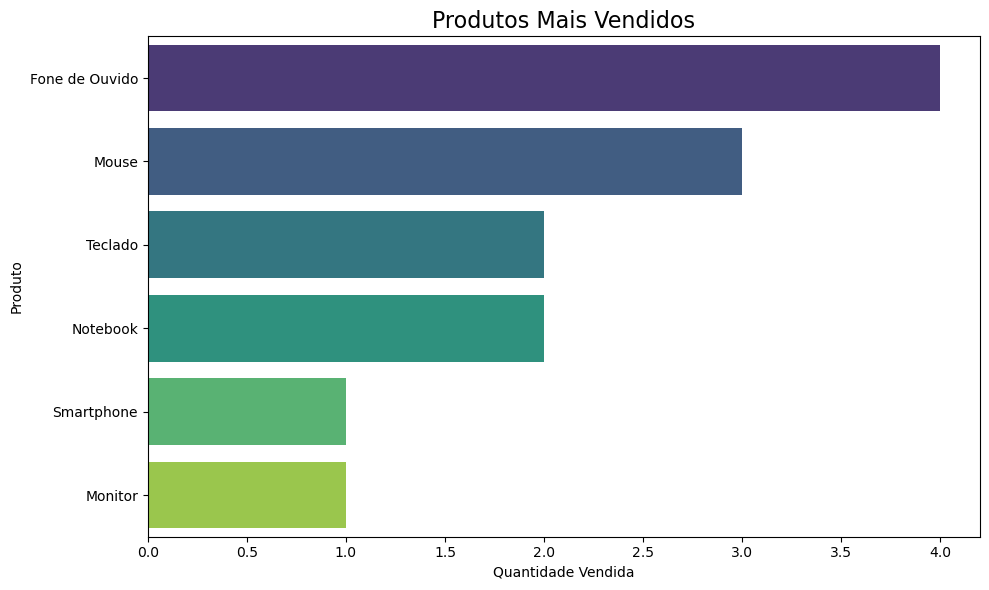

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Estilo do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantidade_Vendida', y='Produto', data=produtos_vendidos, palette='viridis')

# 🏷️ Título e rótulos
plt.title('Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')

# 💾 Salvando o gráfico
plt.tight_layout()
plt.savefig('produtos_mais_vendidos_sql.png')
plt.show()


## 💡 Insights: Produtos Mais Vendidos

🎧 **Fone de ouvido** lidera o ranking de vendas, com 4 unidades — mostrando alta demanda por acessórios de áudio.  
🖱️ **Mouse** aparece em seguida, com 3 unidades vendidas — outro item de fácil giro.

💻 Produtos de maior valor como **Notebook, Monitor e Smartphone** tiveram menor volume de vendas.  
📦 Pode ser interessante reforçar o estoque de itens de alta saída e repensar estratégias para os produtos com giro mais lento.

---

🔎 **Estratégia:**
- Ofertas e promoções para os produtos menos vendidos.
- Potencial de combos com os produtos mais populares (ex: Mouse + Fone).
- Reforçar o marketing de itens de giro rápido para manter o volume de vendas.


In [19]:
# 💾 Consulta SQL para somar a receita por categoria
query_receita_categoria = """
SELECT Categoria, SUM([Valor Total]) AS Receita_Total
FROM vendas
GROUP BY Categoria
ORDER BY Receita_Total DESC
"""

# 🧱 Executando a query e criando o DataFrame
receita_categoria = pd.read_sql_query(query_receita_categoria, conn)
receita_categoria


,Categoria,Receita_Total
0,Eletrônicos,10700
1,Acessórios,940


C:\Users\Aline.Aline\AppData\Local\Temp\ipykernel_3292\2266488543.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=receita_categoria, x="Categoria", y="Receita_Total", palette="pastel")


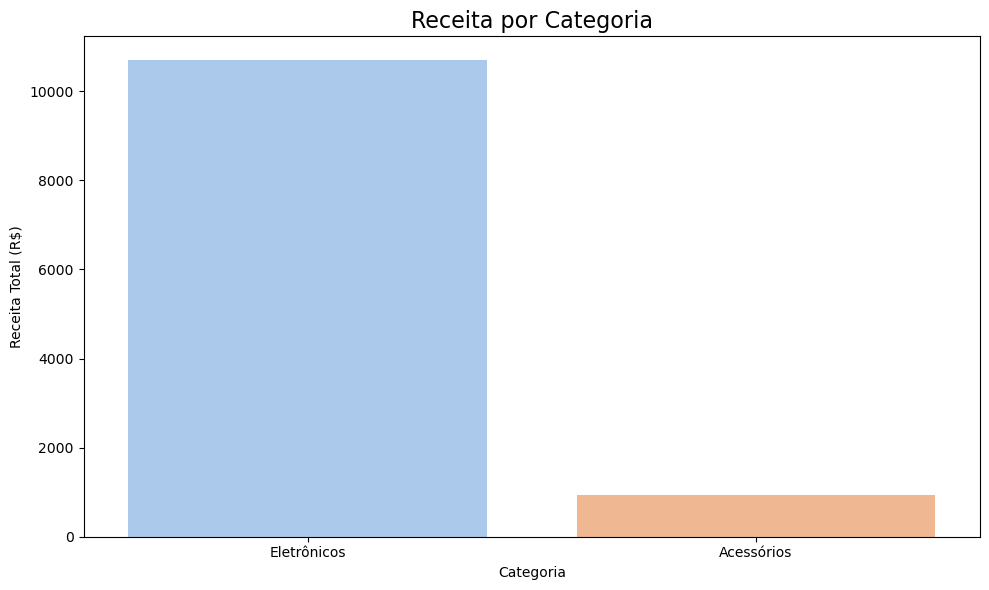

In [24]:
# 🎨 Gráfico de barras com Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Plotando
plt.figure(figsize=(10, 6))
sns.barplot(data=receita_categoria, x="Categoria", y="Receita_Total", palette="pastel")

plt.title("Receita por Categoria", fontsize=16)
plt.xlabel("Categoria")
plt.ylabel("Receita Total (R$)")

# 💾 Salvando o gráfico
plt.tight_layout()
plt.savefig('receita_por_categoria_sql.png')
plt.show()


## 💡 Insights: Receita por Categoria

💰 **Eletrônicos** são disparados os líderes de receita, acumulando o maior faturamento do período.  
Itens como notebook, smartphone e monitor provavelmente estão puxando esse número pra cima.

📦 **Acessórios**, apesar de mais baratos, apresentam receita bem menor. Isso indica que, mesmo vendendo, o ticket é baixo.

---

🔎 **Estratégia:**
- Reforçar o estoque e as campanhas de itens eletrônicos mais procurados.
- Criar kits ou combos com acessórios para aumentar o ticket médio.
- Avaliar se há margem para promoções específicas em acessórios para girar estoque.


In [26]:
# 🧠 Consulta SQL para agrupar as vendas por data
query_evolucao = """
SELECT Data, SUM([Valor Total]) AS Receita_Diaria
FROM vendas
GROUP BY Data
ORDER BY Data
"""

# 🔎 Executando a query
evolucao_diaria = pd.read_sql_query(query_evolucao, conn)

# 📅 Convertendo a coluna de data para datetime (formato brasileiro: dia/mês/ano)
evolucao_diaria['Data'] = pd.to_datetime(evolucao_diaria['Data'], dayfirst=True)

# 👀 Visualizando os dados
display(evolucao_diaria)


,Data,Receita_Diaria
0,2024-01-01,7000
1,2024-01-05,2500
2,2024-01-08,240
3,2024-01-10,1200
4,2024-01-15,300
5,2024-01-20,400


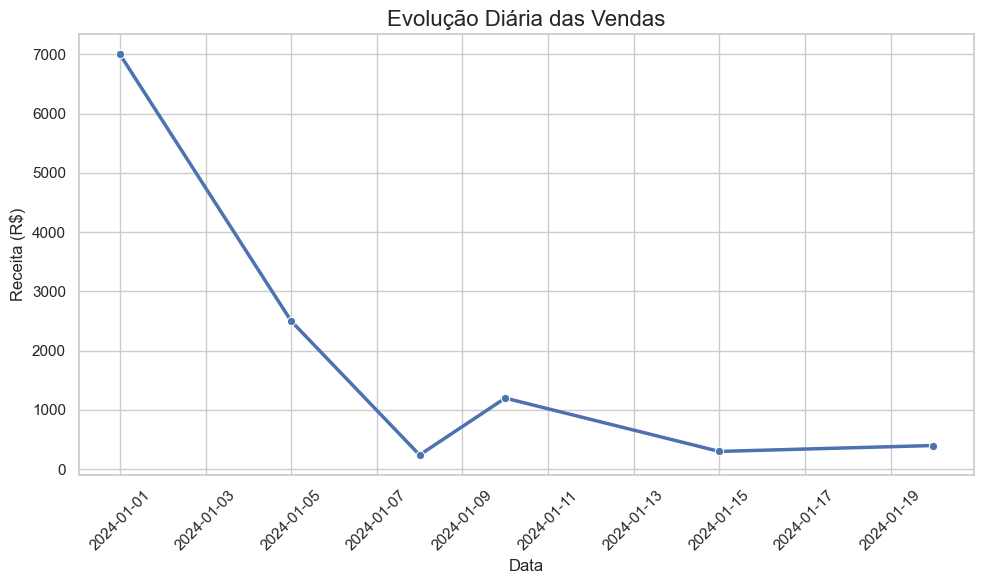

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Estilo bonito para o gráfico
sns.set(style="whitegrid")

# 📊 Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=evolucao_diaria, x='Data', y='Receita_Diaria', marker='o', linewidth=2.5)

plt.title("Evolução Diária das Vendas", fontsize=16)
plt.xlabel("Data")
plt.ylabel("Receita (R$)")
plt.xticks(rotation=45)

# 💾 Salvando o gráfico
plt.tight_layout()
plt.savefig('evolucao_diaria_vendas_sql.png')
plt.show()


## 📈 Insight: Evolução Diária das Vendas

A análise da **evolução diária das vendas** revela um pico significativo de receita em **01/01/2024**, ultrapassando os **R$ 7.000,00**. Esse valor representa o maior volume de vendas registrado no período analisado.

Nos dias seguintes, observa-se uma **queda acentuada nas vendas**, especialmente entre os dias **05/01 e 07/01**, quando a receita despenca para menos de **R$ 300,00**. Após essa baixa, há uma **leve recuperação** no dia **09/01**, seguida por um novo declínio e estabilização em patamares baixos.

Esses dados sugerem uma possível concentração de esforços promocionais ou comportamento de compra mais forte no início do mês, seguido por uma queda natural na demanda. Essa informação pode ser útil para planejar **ações de incentivo** e **campanhas ao longo do mês**, buscando uma maior consistência nas vendas.

---

🔎 **Estratégia:**
- Investigar o que ocorreu nos dias de maior receita e replicar boas práticas.
- Avaliar se os dias com baixa venda coincidem com dias da semana ou feriados.
- Monitorar a evolução com mais dados no futuro para confirmar tendências.
